# Lecture 8 Clustering

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Clustering Models

We will work on two clustering models: K-Means, and DBSCAN. Note that clustering models solve unsupervised learning problems, and there is no observed outcome variables. Therefore, there is no "overfitting" issue, and we do **NOT** need to split our data.

### 1 KMeans
As mentioned in class, K-Means works well when data has a round or oval shape. In below, we would first generate data with round shape, then use K-Mans for clustering.

For K-Means clustering, use syntax:
**<center>sklearn.cluster.KMeans()</center>**
- n_clusters: the number of clusters to use



Similar to supervised learning methods, we use .fit to train our model, use .predict for prediction. Instead of predicting a "y", we are predicting a cluster label. 

We can even use .score to get performance measure. However, the performance measure is irrelevant to "how well we predict", but about "how close the points are". Specifically, the value is -SSE (negative value).

We can also use .cluster_centers_ to get the centroids. 

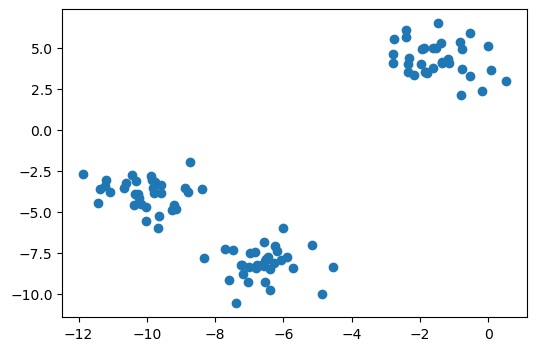

In [2]:
# S1.1: Data Generation
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=1)

# S1.2: Plot Data
plt.figure(figsize=(6, 4))
plt.scatter(X[:,0], X[:,1])

In [3]:
X.shape

(100, 2)

In [4]:
# S2: K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

cls_predict = kmeans.predict(X)

print("Predicted Labels:", cls_predict)
print("Performance Score:", kmeans.score(X))
print("Cluster Centers: \n", kmeans.cluster_centers_)  

Predicted Labels: [1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]
Performance Score: -156.28289251170003
Cluster Centers: 
 [[ -6.58196786  -8.17239339]
 [ -1.4710815    4.33721882]
 [-10.04935243  -3.85954095]]


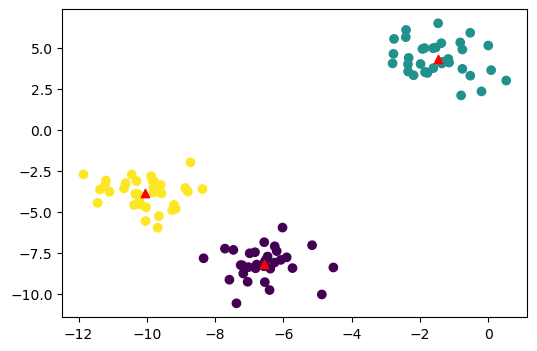

In [5]:
# S3: Visualize our results:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=cls_predict)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], color='red', marker='^')

Text(0.5, 1.0, 'Elbow Method for Optimal k')

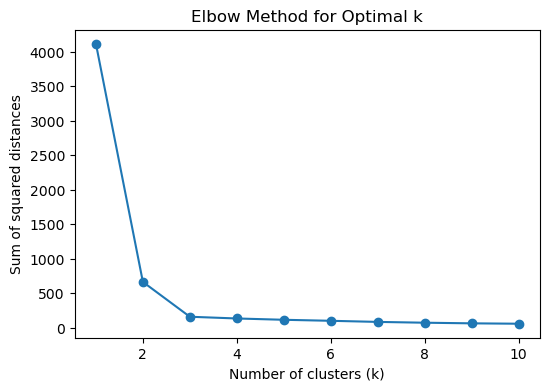

In [6]:
# Plot the elbow graph 

sse = [] # a List to hold the sse values for each number of clusters

k_values = range(1, 11) # Range of possible clusters from 1..10

# Calculate SSEs for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(-kmeans.score(X)) # .score() shows the negative sum of squared distances to cluster centers

# Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal k')

# <span style="color:red">---- Exam II covers the contents upto this point.---- <br /></span>

# Additional Topic - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) 

### (NOT Included in the Test)

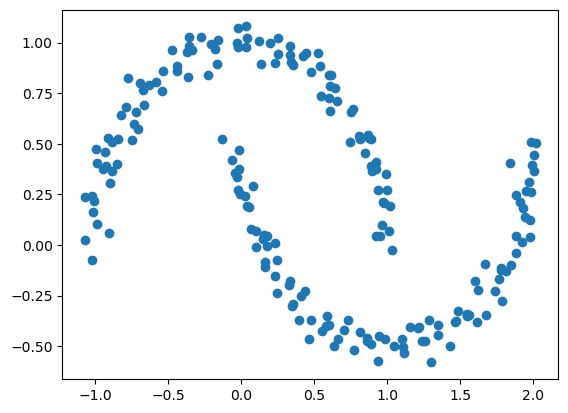

In [7]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise = 0.05, 
                  random_state=0)
plt.scatter(X[:,0], X[:,1])

Predicted Labels: [0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0
 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1
 1 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 1 1 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0]
Performance Score: -79.66234316477879
Cluster Centers: 
 [[ 1.20736718 -0.0825517 ]
 [-0.2003285   0.58035606]]


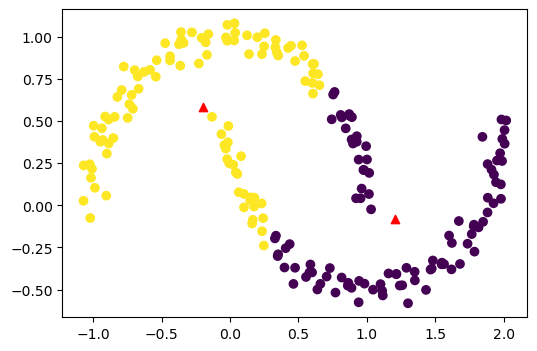

In [8]:
# Use K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

cls_predict = kmeans.predict(X)

print("Predicted Labels:", cls_predict)
print("Performance Score:", kmeans.score(X))
print("Cluster Centers: \n", kmeans.cluster_centers_)  

# S3: Visualize our results:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=cls_predict)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], color='red', marker='^')

In [9]:
# Use DBSCAN Clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
print(clusters)

[0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1]


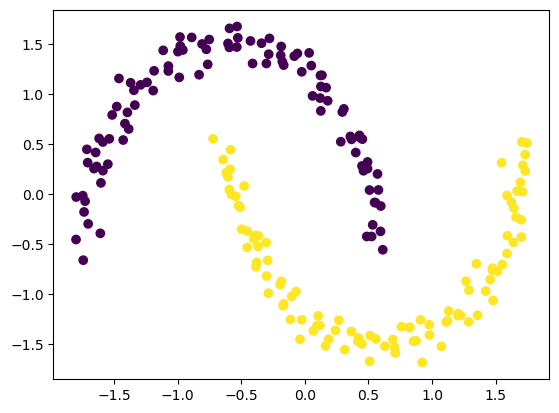

In [10]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters)